<h1 align="center" class="jp-toc-ignore" style="color: LightSeaGreen">Coder Mê Tài Chính</h1>

---
<table width="100%" style="border:0px;">
    <tr style="font-size: 14pt">
        <td><b>Evangelist:</b> Lê Minh Đạt</td>
        <td><b>Email:</b> <a href="mailto:sirminhdat@gmail.com">sirminhdat@gmail.com</a></td>
        <td><b>Zalo:</b> 0919 564 515</td>
    </tr>
</table>

<center><h1 class="jp-toc-ignore"><b>Machine Learning <br> Uncovering The Algo Behind The Scenes</b></h1></center>

<center>
    <h1 style="color: Crimson; margin-top:10px; margin-bottom:0px">Linear Regression With One Variable (aka. Univariate)</h1>
</center>

Giả định ta có một tập dữ liệu được thu thập gồm có giá nhà (Price) và diện tích nhà (Size) được biểu diễn như đồ thị bên dưới:

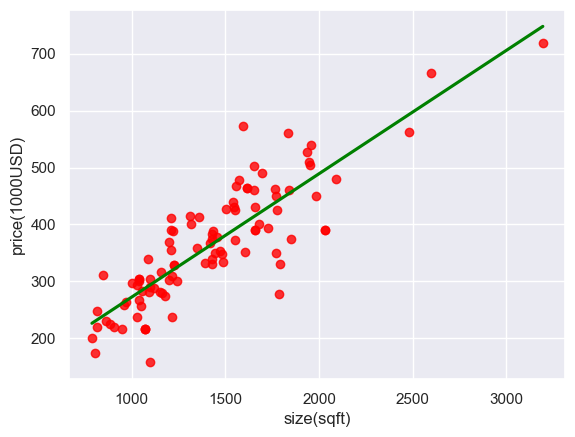

Mục tiêu là ta phải tìm (xây dựng) một cái mô hình (model) như thế nào đó để cho máy tính nó học cái dữ liệu này (nó chỉ việc đi tìm cái đường màu xanh lá như hình), từ đó nó sẽ có thể dữ đoán giá nhà dựa vào diện tích cho trước.

Để cho đơn giản, đầu tiên mình chỉ sử dụng 2 điểm dữ liệu như bảng sau để làm dữ liệu training:

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

In [12]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import altair as alt # pip install altair

In [13]:
x_train = np.array([1.0, 2.0]) # Diện tích (Size)
y_train = np.array([300, 500]) # Giá nhà (Price)

<h3>Model function</h3>

$$
\begin{align}
\Large \hat{y}_{w,b}^{(i)}=wx^{(i)} + b \\ \\
\Large f_{w,b}(x^{(i)})=wx^{(i)} + b
\end{align}
$$

<h3>Cost/Error function</h3>

Cost/Error được hiểu như là thước đo mức độ dự đoán chính xác giá mục tiêu của ngôi nhà mà mô hình của mình dự đoán.

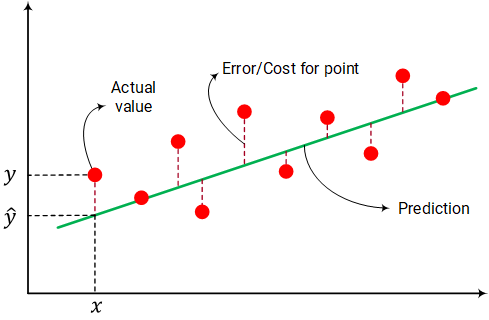

$$
\Large J(w,b)=\frac{1}{2m}\sum_{i=1}^{m}\bigl(\hat{y}_{w,b}^{(i)}-y^{(i)}\bigr)^2
$$

- $m:$ là số lượng dữ liệu
- $\large \hat{y}_{w,b}^{(i)}:$ là giá trị dự đoán của sample $x^{(i)}$ với 2 tham số $w, b$
- $\large (\hat{y}_{w,b}^{(i)}-y^{(i)})^2:$ gọi là bình phương sai số giữa giá trị dự đoán và giá trị thực tế thứ $i$
- $\large J(w,b):$ là hàm chi phí (cost) được tính theo tham số $w, b$

<h4>Viết code cho hàm chi phí (Cost function)</h4>

In [19]:
def compute_cost(x, y, w, b):
    """
    Parameters:
        x (numpy.ndarray(m,)) : Feature data with m samples (observations)
        y (numpy.ndarray(m,)) : Target values
        w (scalar) : Model parameter
        b (scalar) : Model parameter

    Return:
        j_wb (float): The cost of using parameters w, b for linear regression
               to fit the data points in x and y
    """
    m_samples = x.shape[0]
    sum_cost = 0

    for i in range(m_samples):
        y_wb = (w * x[i]) + b # Tính y_wb thứ i
        cost = (y_wb - y[i]) ** 2 # Tính bình phương sai số (cost) giữa y_wb và y thứ i 
        sum_cost = sum_cost + cost # Cộng dồn cost thứ i và sum_cost

    j_wb = sum_cost / (2 * m_samples)
    return j_wb

In [15]:
compute_cost(x_train, y_train, 1, 100)

49501.25

In [16]:
arr_w = [50, 100, 150, 170, 200]
for w in arr_w:
    _cost = compute_cost(x_train, y_train, w, 100)
    print(f"w: {w:3} -> Cost: {_cost}")

w:  50 -> Cost: 28125.0
w: 100 -> Cost: 12500.0
w: 150 -> Cost: 3125.0
w: 170 -> Cost: 1125.0
w: 200 -> Cost: 0.0


<h3>Vẽ chart biểu diễn tương tác giữa Cost và w, cố định giá trị b=100</h3>

In [6]:
#ALTAIR
b = 100
r_step = 5
r_start = 0
r_stop = 400

slider = alt.binding_range(min=r_start, max=r_stop, step=r_step)
w_slider = alt.param(name="w", bind=slider, value=50)


arr_w = np.arange(r_start, r_stop, r_step)

df_actual_point = pd.DataFrame({
    'x_actual': x_train,
    'y_actual': y_train,
})

df_prediction_line = pd.DataFrame({
    'w': arr_w,
    'x': np.ones(len(arr_w)) * x_train[0],
    'y': np.array([w * x_train[0] + b for w in arr_w]),
    'x2': np.ones(len(arr_w)) * x_train[1],
    'y2': np.array([w * x_train[1] + b for w in arr_w]),
    'y_actual_1': np.ones(len(arr_w)) * y_train[0],
    'y_actual_2': np.ones(len(arr_w)) * y_train[1]
})


actual_point = alt.Chart(df_actual_point).mark_point(
    filled=True,
    size=150,
    color='red'
).encode(
    x=alt.X('x_actual', title="Size", scale=alt.Scale(domain=[0.5, 2.4], clamp=True)),
    y=alt.Y('y_actual', title="Price")
)

prediction_line = alt.Chart(df_prediction_line).mark_line(
    strokeWidth=4,
    color='#00CED1'
).encode(
    x='x',
    y='y',
    x2='x2',
    y2='y2',
    opacity=alt.condition(
        alt.datum.w == w_slider,
        alt.value(1), alt.value(0)
    )
).add_params(
    w_slider
)

vline1_1 = alt.Chart(df_prediction_line).mark_rule(
    strokeDash=[4, 4],
    strokeWidth=2,
    color='brown'
).encode(
    y='y',
    y2='y_actual_1',
    x='x',
    opacity=alt.condition(
        alt.datum.w == w_slider,
        alt.value(1), alt.value(0)
    )
)

vline1_2 = alt.Chart(df_prediction_line).mark_rule(
    strokeDash=[4, 4],
    strokeWidth=2,
    color='brown'
).encode(
    y='y2',
    y2='y_actual_2',
    x='x2',
    opacity=alt.condition(
        alt.datum.w == w_slider,
        alt.value(1), alt.value(0)
    )
)
##################################################################################

arr_cost = np.zeros(arr_w.shape)
for _i, _w in enumerate(arr_w):
    arr_cost[_i] = compute_cost(x_train, y_train, _w, b)
    
df_cost = pd.DataFrame({
    'w': arr_w,
    'cost': arr_cost,
    'y2': np.zeros(arr_cost.shape),
    'x2': np.zeros(arr_cost.shape)
})

cost_line = alt.Chart(df_cost).mark_line(
    color='green',
    strokeWidth=4
).encode(
    x=alt.X('w', title="w"),
    y=alt.Y('cost', title='Cost')
)

vline2 = cost_line.mark_rule(
    strokeDash=[4, 4],
    strokeWidth=2,
    color='brown'
).encode(    
    y2='y2',
    opacity=alt.condition(
        alt.datum.w == w_slider,
        alt.value(1), alt.value(0)
    )
)

hline2 = cost_line.mark_rule(
    strokeDash=[4, 4],
    strokeWidth=2,
    color='brown'
).encode(
    x2='x2',
    opacity=alt.condition(
        alt.datum.w == w_slider,
        alt.value(1), alt.value(0)
    )
)

cost_point = cost_line.mark_point(
    filled=True,
    size=150,
    color='red'
).encode(
    # x='w',
    # y='cost',
    # color=alt.value("red"),    
    opacity=alt.condition(
        alt.datum.w == w_slider,
        alt.value(1), alt.value(0)
    )
).add_params(
    w_slider
)

# (prediction_line + vline1_1 + vline1_2 + actual_point) | (cost_line + vline2 + hline2 + cost_point)
plot1 = alt.layer(prediction_line, vline1_1, vline1_2, actual_point).properties(width=400, height=300, title='House Pricing')
plot2 = alt.layer(cost_line, vline2, hline2, cost_point).properties(width=400, height=300, title=f'Cost(w, b={b})')

(plot1 | plot2).configure_axis(
    labelFontSize=14,
    titleFontSize=14
).configure_title(
    # font='Courier',
    # anchor='middle',
    # color='gray',
    fontSize=18
)

alt.HConcatChart(...)

<h3>Vẽ chart biểu diễn tương tác giữa Cost và w, b</h3>

In [17]:
x_train2 = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2, 3.6])
y_train2 = np.array([250, 300, 480, 430, 630, 730, 820])

In [9]:
_size = 300
w_range = np.array([200 - _size, 200 + _size])
b_range = np.array([50 - _size, 50 + _size])
m = 25
b_space  = np.linspace(*b_range, m)
w_space  = np.linspace(*w_range, m)

arr_w = np.zeros(m*m)
arr_b = np.zeros(m*m)
arr_cost = np.zeros(m*m)

k = 0
for i in range(m):
    for j in range(m):
        arr_w[k] = w_space[i]
        arr_b[k] = b_space[j]
        _cost = compute_cost(x_train2, y_train2, w_space[i], b_space[j])
        if _cost == 0: _cost = 1e-6
        arr_cost[k] = _cost
        k += 1

idx = np.argsort(arr_cost)[0]
print(f"Min Cost: {arr_cost[idx]} | w: {arr_w[idx]} ~ b: {arr_b[idx]}")

df = pd.DataFrame(columns = ["id", "w", "b", 'cost', "x_train", "y_wb"])

k = 0
for i in range(len(arr_w)):
    for x in x_train2:
        y_wb = x * arr_w[i] + arr_b[i]
        tmp = [i, arr_w[i], arr_b[i], arr_cost[i], x, y_wb]
        df.loc[k] = tmp
        k += 1

df = df.astype({"id": 'int'})

selector = alt.selection_point(on='mouseover', fields=['id'], nearest=True)

base = alt.Chart(df).properties(
    width=350,
    height=350
).add_params(selector)

wb_points = base.mark_point(filled=True, size=100).encode(
    x=alt.X('mean(w)', title='w'),
    y=alt.Y('mean(b)', title='b'),
    tooltip=[alt.Tooltip("mean(cost)", title='Cost:'), alt.Tooltip('w', title='w:'), alt.Tooltip('b', title='b:')],
    color=alt.condition(selector, 'id:O', alt.value('lightgray'), legend=None),
    # color=alt.condition(selector, alt.value('steelblue'), alt.value('lightgray'), legend=None)
)

prediction_lines = base.mark_line().encode(
    x='x_train',
    y=alt.Y('y_wb').scale(domain=(-600, 2100)),    
    color=alt.Color('id:O').legend(None)
    
).transform_filter(
    selector
)

df_actual_point = pd.DataFrame({
    'x_actual': x_train2,
    'y_actual': y_train2,
})

actual_point = alt.Chart(df_actual_point).mark_point(
    filled=True,
    size=100,
    color='red'
).encode(
    x=alt.X('x_actual', title="Size", scale=alt.Scale(domain=[0.5, 4.0], clamp=True)),
    y=alt.Y('y_actual', title="Price")
)

plot1 = alt.layer(prediction_lines, actual_point).properties(title='House Pricing')
plot2 = alt.layer(wb_points).properties(title='Cost(w,b)')
(plot1 | plot2).configure_axis(
    labelFontSize=14,
    titleFontSize=14
).configure_title(
    # font='Courier',
    # anchor='middle',
    # color='gray',
    fontSize=18
)

Min Cost: 1659.8214285714287 | w: 225.0 ~ b: -25.0


alt.HConcatChart(...)

<h3>Gradient Descent</h3>

Gradient Descent là quá trình tính toán đạo hàm của hàm cost $J(w,b)$ theo $w,b$ và cập nhật giá trị của $w$ và $b$ cho đến khi hàm cost $J(w,b)$ đạt cực tiểu với $\eta$ (đọc là eta) là learning rate

$$
\begin{align}
\Large w &= \Large w - \eta \frac{\partial J(w,b)}{\partial w} \\ \\
\Large b &= \Large b - \eta \frac{\partial J(w,b)}{\partial b} \\
\end{align}
$$

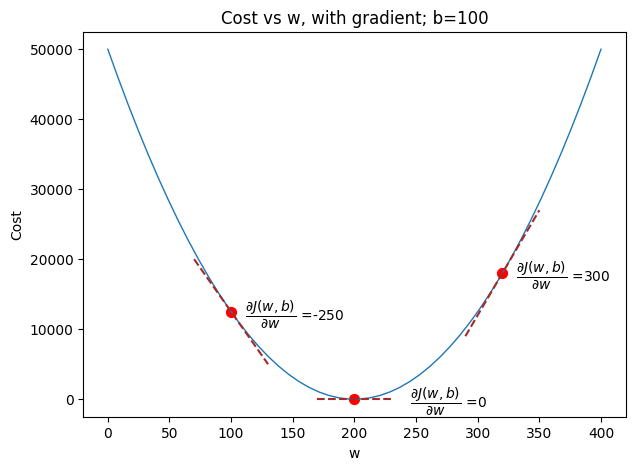

In [21]:
fix_b = 100
arr_w = np.linspace(0, 400, 50)
arr_cost = np.zeros(arr_w.shape)

for i, w in enumerate(arr_w):
    arr_cost[i] = compute_cost(x_train, y_train, w, fix_b)

plt.figure(figsize=(7, 5))
# plt.grid(True)
plt.plot(arr_w, arr_cost, linewidth=1)
plt.title("Cost vs w, with gradient; b=100")
plt.ylabel('Cost')
plt.xlabel('w')

for w in [100, 200, 320]:
    fix_b = 100
    dj_dw, dj_db = compute_partial_derivative(x_train, y_train, w, fix_b)
    cost = compute_cost(x_train, y_train, w, fix_b)
    plt.scatter(w, cost, color='red', s=50)
    
    #Plot the value of the derivative at point w and the tangent
    x = np.linspace(w-30, w+30, 50)
    y = dj_dw*(x - w) + cost
    plt.plot(x, y, '--', c='brown', linewidth = 1.5)
    xoff = 40 if w == 200 else 10
    plt.annotate(r"$\dfrac{\partial J(w,b)}{\partial w}$ =%d" % dj_dw, 
        fontsize=10, xy=(w, cost), xycoords='data', xytext=(xoff, 10), 
        textcoords='offset points', horizontalalignment='left', verticalalignment='top')
    

plt.show()

**Note:**
Giá trị đạo hàm của hàm cost $J(w,b)$ tại một điểm $w$ cho biết hướng đi của hàm cost $J(w,b)$ là tăng hay giảm

<h4>Khai triển công thức tính đạo hàm của Cost function</h4>

Công thức model:

$$
\Large \hat{y}_{w,b}^{(i)}=wx^{(i)} + b \tag1
$$

Công thức Cost function:

$$
\Large J(w,b) = \frac{1}{2m}\sum_{i=1}^{m}\bigl(\hat{y}_{w,b}^{(i)}-y^{(i)}\bigr)^2 \tag2
$$

Đưa $\dfrac{1}{2}$ vào trong tổng:

$$
\Large J(w,b)=\frac{1}{m}\sum_{i=1}^{m}\frac{1}{2}\bigl(\hat{y}_{w,b}^{(i)}-y^{(i)}\bigr)^2 \tag3
$$

Gọi $L(w,b)^{(i)}$ là hàm lost thành phần thứ $i$:

$$
\Large L(w,b)^{(i)} = \frac{1}{2}\bigl(\hat{y}_{w,b}^{(i)}-y^{(i)}\bigr)^2 \tag4
$$
$\newline$
$$
\Large\Rightarrow J(w,b) = \frac{1}{m}\sum_{i=1}^{m}L(w,b)^{(i)} \tag5
$$

Đạo hàm một tổng thì bằng tổng các đạo hàm thành phần. Từ $(5) \Rightarrow$ Đạo hàm của $J(w,b)$ theo $w,b$:

$$
\Large \frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum\limits_{i=1}^{m} \frac{\partial L(w,b)}{\partial w}^{(i)} \tag6 
$$
$\newline$
$$
\Large \frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum\limits_{i=1}^{m} \frac{\partial L(w,b)}{\partial b}^{(i)} \tag7
$$

Thế $(1)$ vào $(4)$ ta có:
$$
\Large L(w,b)^{(i)} = \Large \frac{1}{2}\bigl([wx^{(i)} + b]-y^{(i)}\bigr)^2 \tag8 \\ \\
$$

Lấy đạo hàm 2 vế của $(8)$ theo $w$ và $b$:

$$
\Large \frac{\partial L(w,b)}{\partial w}^{(i)} = \bigl([wx^{(i)} + b]-y^{(i)}\bigr)x^{(i)} \tag9
$$
$\newline$
$$
\Large \frac{\partial L(w,b)}{\partial b}^{(i)} = \bigl([wx^{(i)} + b]-y^{(i)}\bigr) \tag{10}
$$

**Note:**
Nếu $u$ là hàm hợp: $(u^k)'=k.u^{(k-1)}.(u)'$



Thay $(9)$ vào $(6)$, $(10)$ vào $(7)$:

$$
\Large \frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum\limits_{i=1}^{m} \bigl([wx^{(i)} + b]-y^{(i)}\bigr)x^{(i)} \tag{12}
$$
$\newline$
$$
\Large \frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum\limits_{i=1}^{m} \bigl([wx^{(i)} + b]-y^{(i)}\bigr) \tag{13}
$$

<h4>Viết code cho hàm tính đạo hàm Cost function theo w, b</h4>

In [20]:
def compute_partial_derivative(x, y, w, b):
    """
    Parameters:
        x (numpy.ndarray(m,)) : Feature data with m samples (observations)
        y (numpy.ndarray(m,)) : Target values
        w (scalar) : Model parameter
        b (scalar) : Model parameter

    Return:
        dj_dw (scalar): The derivative value with respect to w
        dj_db (scalar): The derivative value with respect to b  
    """
    m_samples = x.shape[0]
    dj_w = 0
    dj_b = 0

    for i in range(m_samples):
        y_wb = (w * x[i]) + b
        dj_w += (y_wb - y[i]) * x[i]
        dj_b += y_wb - y[i]

    dj_dw = dj_w / m_samples
    dj_db = dj_b / m_samples
    
    return dj_dw, dj_db

Cập nhật $w,b$ cho đến khi hàm cost $J(w,b)$ đạt cực tiểu (hoặc hội tụ), với $\eta$ (đọc là eta) là learning rate

$$
\begin{align}
\Large w &= \Large w - \eta \frac{\partial J(w,b)}{\partial w} \\ \\
\Large b &= \Large b - \eta \frac{\partial J(w,b)}{\partial b} \\
\end{align}
$$

**Note:** Hàm cost $J(w,b)$ đạt cực tiểu khi $\dfrac{\partial J(w,b)}{\partial w}=0$ và $\dfrac{\partial J(w,b)}{\partial b}=0$

<h4>Viết code cho hàm tính Gradient Descent</h4>

In [22]:
def compute_gradient_descent(x, y, n_iters=1000, w_init=0, b_init=0, eta=0.01):
    """
    Parameters:
        x (numpy.ndarray(m,)) : Feature data with m samples (observations)
        y (numpy.ndarray(m,)) : Target values
        n_iters (int) : Number of iterations to run gradient descent
        eta (float) : learning rate value between 0 and 1
        w_init (scalar) : Initial values of model parameter w
        b_init (scalar) : Initial values of model parameter b
    Return:
        w (scalar) : Updated values of parameter w
        b (scalar) : Updated value of parameter b
        trace (dict) : history value in each step of:
                            cost,
                            wb (values of w, b),
                            dj (derivative values of w, b)
    """
    w = w_init
    b = b_init

    cost_hist = [] # Lưu cost ở từng bước thứ i
    wb_hist = [] # Lưu {w, b} ở từng bước thứ i
    dj_hist = [] # Lưu {dj_dw, dj_db} ở từng bước thứ i

    threshold = 10e4 # Ngưỡng giá trị để không lưu cost, wb, dj nếu như n_iters lớn hơn giá trị này, tránh bị tốn RAM 

    for i in range(int(n_iters)):
        dj_dw, dj_db = compute_partial_derivative(x, y, w, b)
        w = w - eta * dj_dw # Cập nhật giá trị mới cho w
        b = b - eta * dj_db # Cập nhật giá trị mới cho b
        _cost = compute_cost(x, y, w, b)

        if i < threshold:
            cost_hist.append(_cost)
            wb_hist.append({'w': w, 'b': b})
            dj_hist.append({'w': {'dj_dw': dj_dw, 'eta*dj_dw': (eta * dj_dw)}, 'b': {'dj_db': dj_db, 'eta*dj_db': (eta * dj_db)}})

        # In các giá trị của cost, w, b, đạo hàm tại các bước
        if i % np.ceil(n_iters/10) == 0:
            print(f"Step {i:4}:")
            print(f"\tCost: {_cost}")
            print(f"\tdj_dw: {dj_dw}\tdj_db: {dj_db}")
            print(f"\teta*dj_dw: {(eta * dj_dw)}\teta*dj_db: {(eta * dj_db)}")
            print(f"\tw: {w}\tb: {b}")    
    
    trace = { 
        'cost': cost_hist,
        'wb': wb_hist,
        'dj': dj_hist
    }
    return w, b, trace

In [23]:
_n_iters = 10000
_eta = 0.01
_w, _b, _trace = compute_gradient_descent(x_train, y_train, n_iters=_n_iters, eta=_eta)
print("="*100)
print(f"w,b discovered by Gradient Descent: w={_w} | b={_b}")
print(f"Cost: {_trace['cost'][-1]}")
print("The convergence to zero of the derivative computing with learning rate:")
print(f"dj_dw={_trace['dj'][-1]['w']} | dj_db={_trace['dj'][-1]['b']}")

Step    0:
	Cost: 79274.8125
	dj_dw: -650.0	dj_db: -400.0
	eta*dj_dw: -6.5	eta*dj_db: -4.0
	w: 6.5	b: 4.0
Step 1000:
	Cost: 3.4125109319154174
	dj_dw: -0.3712293911791278	dj_db: 0.6006617725498984
	eta*dj_dw: -0.003712293911791278	eta*dj_db: 0.006006617725498984
	w: 194.91482409389593	b: 108.2279874548482
Step 2000:
	Cost: 0.7928950684538176
	dj_dw: -0.17894237030935756	dj_db: 0.28953483718788675
	eta*dj_dw: -0.0017894237030935756	eta*dj_db: 0.0028953483718788674
	w: 197.5488109193384	b: 103.96610724536305
Step 3000:
	Cost: 0.1842287401041018
	dj_dw: -0.0862549481608994	dj_db: 0.13956343782209046
	eta*dj_dw: -0.000862549481608994	eta*dj_db: 0.0013956343782209047
	w: 198.81846212990547	b: 101.91176843280807
Step 4000:
	Cost: 0.04280544807338754
	dj_dw: -0.041577162912062704	dj_db: 0.06727326274764778
	eta*dj_dw: -0.00041577162912062707	eta*dj_db: 0.0006727326274764778
	w: 199.43046754349498	b: 100.92152287232139
Step 5000:
	Cost: 0.0099458226969803
	dj_dw: -0.02004129053085535	dj_db: 0.

In [26]:
_n_iters = 10000
_eta = 0.01
_w, _b, _trace = compute_gradient_descent(x_train2, y_train2, n_iters=_n_iters, eta=_eta)
print("="*100)
print(f"w,b discovered by Gradient Descent: w={_w} | b={_b}")
print(f"Cost: {_trace['cost'][-1]}")
print("The convergence to zero of the derivative computing with learning rate:")
print(f"dj_dw={_trace['dj'][-1]['w']} | dj_db={_trace['dj'][-1]['b']}")

Step    0:
	Cost: 132863.20047548978
	dj_dw: -1424.7142857142858	dj_db: -520.0
	eta*dj_dw: -14.247142857142858	eta*dj_db: -5.2
	w: 14.247142857142858	b: 5.2
Step 5000:
	Cost: 1658.583128713608
	dj_dw: -0.02783293943913025	dj_db: 0.07476950478698541
	eta*dj_dw: -0.0002783293943913025	eta*dj_db: 0.0007476950478698541
	w: 223.87644042373668	b: -23.62522899080645
Step 10000:
	Cost: 1658.5500305040227
	dj_dw: -0.0002289361751479646	dj_db: 0.0006150067070507248
	eta*dj_dw: -2.2893617514796463e-06	eta*dj_db: 6.150067070507248e-06
	w: 224.16381224779246	b: -24.397215328120303
Step 15000:
	Cost: 1658.5500282647074
	dj_dw: -1.8830843982544008e-06	dj_db: 5.058656585431111e-06
	eta*dj_dw: -1.883084398254401e-08	eta*dj_db: 5.058656585431111e-08
	w: 224.16617598685602	b: -24.40356519999113
Step 20000:
	Cost: 1658.5500282645553
	dj_dw: -1.54891007956134e-08	dj_db: 4.1609305461471583e-08
	eta*dj_dw: -1.5489100795613403e-10	eta*dj_db: 4.1609305461471583e-10
	w: 224.16619542948015	b: -24.403617430025246